In [1]:
import os
from fnmatch import fnmatch

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import fitsio

from astropy.io import fits, ascii
from astropy.table import Table
import astropy.units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0 = 70, Om0 = 0.3, Ode0 = 0.7)

plt.rcParams.update({
    'font.family'      :'serif',
    'font.size'        : 24,
    'font.serif'       :'Georgia',
    'axes.labelsize'   :'large',
    'mathtext.fontset' :'stix',
    'axes.linewidth'   :  1.5,
    'xtick.direction'  :'in',
    'ytick.direction'  :'in',
    'xtick.major.size' : 5,
    'ytick.major.size' : 5,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
})

import treecorr

KiDS-1000 tomographic binning: <br>
| Bin |    $z_{\rm B}$ range     |       $m$        |
|-----|:------------------------:|:----------------:|
|  1  |$0.1 < z_{\rm B} \leq 0.3$|$-0.009 \pm 0.019$|
|  2  |$0.3 < z_{\rm B} \leq 0.5$|$-0.011 \pm 0.020$|
|  3  |$0.5 < z_{\rm B} \leq 0.7$|$-0.015 \pm 0.017$|
|  4  |$0.7 < z_{\rm B} \leq 0.9$|$ 0.002 \pm 0.012$|
|  5  |$0.9 < z_{\rm B} \leq 1.2$|$ 0.007 \pm 0.010$|<br>

Drawn from Giblin et al. (2020)


In [2]:
# bin1_data = fitsio.read('/data2/lsajkov/mpdg/data/KiDS/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat/KiDS_DR4.1_WL_bin1.fits', ext = 1)
# bin1_data = Table(bin1_data)

# bin2_data = fitsio.read('/data2/lsajkov/mpdg/data/KiDS/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat/KiDS_DR4.1_WL_bin2.fits', ext = 1)
# bin2_data = Table(bin2_data)

bin3_data = fitsio.read('/data2/lsajkov/mpdg/data/KiDS/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat/KiDS_DR4.1_WL_bin3.fits', ext = 1)
bin3_data = Table(bin3_data)

# bin4_data = fitsio.read('/data2/lsajkov/mpdg/data/KiDS/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat/KiDS_DR4.1_WL_bin4.fits', ext = 1)
# bin4_data = Table(bin4_data)

# bin5_data = fitsio.read('/data2/lsajkov/mpdg/data/KiDS/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat/KiDS_DR4.1_WL_bin5.fits', ext = 1)
# bin5_data = Table(bin5_data)

: 

In [23]:
# n_z_bin1 = ascii.read('/data2/lsajkov/mpdg/data/KiDS/SOM_N_of_Z/K1000_NS_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_SOMcols_Fid_blindC_TOMO1_Nz.asc')
# n_z_bin2 = ascii.read('/data2/lsajkov/mpdg/data/KiDS/SOM_N_of_Z/K1000_NS_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_SOMcols_Fid_blindC_TOMO2_Nz.asc') 
n_z_bin3 = ascii.read('/data2/lsajkov/mpdg/data/KiDS/SOM_N_of_Z/K1000_NS_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_SOMcols_Fid_blindC_TOMO3_Nz.asc') 
# n_z_bin4 = ascii.read('/data2/lsajkov/mpdg/data/KiDS/SOM_N_of_Z/K1000_NS_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_SOMcols_Fid_blindC_TOMO4_Nz.asc') 
# n_z_bin5 = ascii.read('/data2/lsajkov/mpdg/data/KiDS/SOM_N_of_Z/K1000_NS_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_SOMcols_Fid_blindC_TOMO5_Nz.asc') 

In [24]:
# n_z_mean_bin1 = np.dot(n_z_bin1['col1'], n_z_bin1['col2'])
# n_z_mean_bin2 = np.dot(n_z_bin2['col1'], n_z_bin2['col2'])
n_z_mean_bin3 = np.dot(n_z_bin3['col1'], n_z_bin3['col2'])
# n_z_mean_bin4 = np.dot(n_z_bin4['col1'], n_z_bin4['col2'])
# n_z_mean_bin5 = np.dot(n_z_bin5['col1'], n_z_bin5['col2'])

In [35]:
n_z_mstar_md = ascii.read('/data2/lsajkov/mpdg/data_products/KiDS/WL/n_z/mstar_md_n_z')

In [36]:
n_z_mean_mstar_md_bin = np.dot(n_z_mstar_md['col0'], n_z_mstar_md['col1'])

In [25]:
def degree_to_hMpc(degree, redshift):
    radian = (degree * u.degree).to(u.radian)
    comoving_dist_Mpc = cosmo.comoving_distance(redshift).value
    hMpc = comoving_dist_Mpc * np.tan(radian)
    return hMpc

def hMpc_to_degree(hMpc, redshift):
    comoving_dist_Mpc = cosmo.comoving_distance(redshift).value
    radian = np.arctan(hMpc/comoving_dist_Mpc)
    degree = (radian * u.radian).to(u.degree)
    return degree.value

Attempt to measure signal in tomographic bin 3, higher mass dwarfs

In [28]:
sources_bin3 = treecorr.Catalog(ra = bin3_data['RAJ2000'], dec = bin3_data['DECJ2000'],
                                g1 = bin3_data['e1'], g2 = bin3_data['e2'],
                                w = bin3_data['weight'],
                                ra_units = 'degrees', dec_units = 'degrees')

In [29]:
lens_cat = treecorr.Catalog('/data2/lsajkov/mpdg/data_products/predicted_catalogs/KiDS_mstar_md_bin_31Jul24.fits',
                            ra_col = 'ra', dec_col = 'dec',
                            ra_units = 'degrees', dec_units = 'degrees')
                            #   w = 'weight')

In [37]:
log10_hMpc_bin_lo = -2
log10_hMpc_bin_hi = 2
bins = 30
hMpc_bins = np.logspace(log10_hMpc_bin_lo, log10_hMpc_bin_hi, bins)

degree_bins = hMpc_to_degree(hMpc_bins, n_z_mean_mstar_md_bin)

In [38]:
config = {'nbins':   bins,
          'min_sep': degree_bins[0],
          'max_sep': degree_bins[-1],
          'sep_units': 'degree'}

In [39]:
ngc = treecorr.NGCorrelation(config = config)

In [40]:
ngc.process(lens_cat, sources_bin3)

Text(0, 0.5, '$\\langle \\gamma_T \\rangle$')

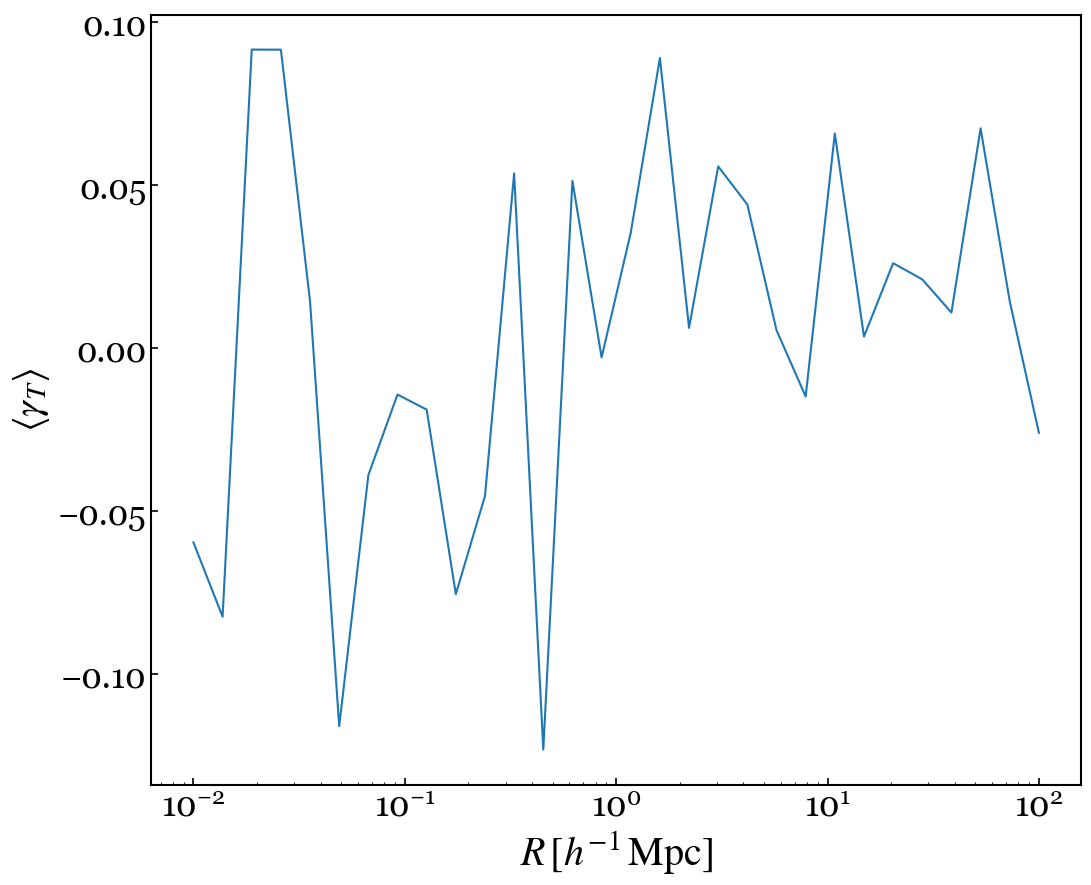

In [41]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

ax.plot(hMpc_bins, ngc.xi)
ax.set_xscale('log')
ax.set_xlabel(r'$R\, [h^{-1} {\rm\, Mpc}]$')
ax.set_ylabel(r'$\langle \gamma_T \rangle$')

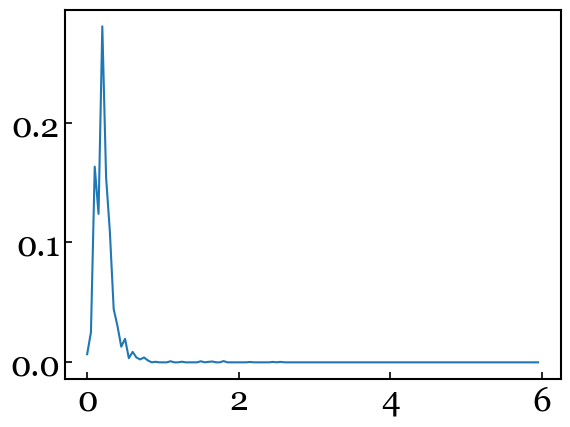

In [21]:
plt.plot(n_z_bin1['col1'],
         n_z_bin1['col2'])

In [ ]:
avg_sigma_crit = 